In [32]:
from plot_tensorboard import extract_tensorboard_scalars
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [73]:
ppo_curriculum = extract_tensorboard_scalars("../logs/ppo_curriculum_1702255925", scalar_keys="charts/episodic_return")['charts/episodic_return']
ppo_norm = extract_tensorboard_scalars("../logs/ppo_normal_1702262388", scalar_keys="charts/episodic_return")['charts/episodic_return']
plot_plt = lambda df, **kw : plt.plot(df["step"], df["value"], **kw)
plot_plt_rolling = lambda df, window, **kw : plt.plot(df["step"], pd.DataFrame(df["value"]).rolling(window=window).mean(), **kw)

def plot_diff(color='red', interval=102400):
    x = np.arange(0, interval * 11, interval)
    for i in x:
        plt.axvline(x = i, color=color, linestyle='dashed')

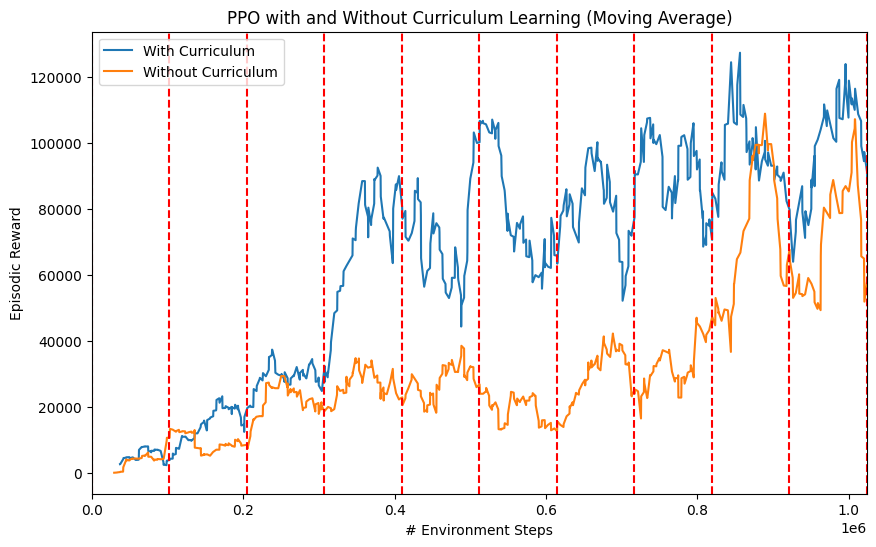

: 

In [81]:
fig = plt.figure(figsize=(10, 6))
PLOT1_WINDOW=20
ppo_c = plot_plt_rolling(ppo_curriculum, PLOT1_WINDOW, label="With Curriculum")
ppo_n = plot_plt_rolling(ppo_norm, PLOT1_WINDOW, label="Without Curriculum")
# plot_plt(ppo_curriculum, alpha=0.2, color=ppo_c[0].get_color())
# plot_plt(ppo_norm, alpha=0.2, color=ppo_n[0].get_color())
plt.xlabel("# Environment Steps")
plt.ylabel("Episodic Reward")
plt.xlim((0, 1024000))
plot_diff()
plt.legend()

plt.title("PPO with and Without Curriculum Learning (Moving Average)")

plt.savefig("images/PPO_figure_with_no_window.png")

In [77]:
ddpg_curriculum = extract_tensorboard_scalars("../logs/quad_with_vision__ddpg_cir__1__1702369471", scalar_keys="charts/episodic_return")['charts/episodic_return']
ddpg_norm = extract_tensorboard_scalars("../logs/quad_with_vision__ddpg_no_cir__1__1702345762", scalar_keys="charts/episodic_return")['charts/episodic_return']
ddpg_curriculum["step"] = np.multiply(ddpg_curriculum["step"], 256)
ddpg_norm["step"] = np.multiply(ddpg_norm["step"], 256)

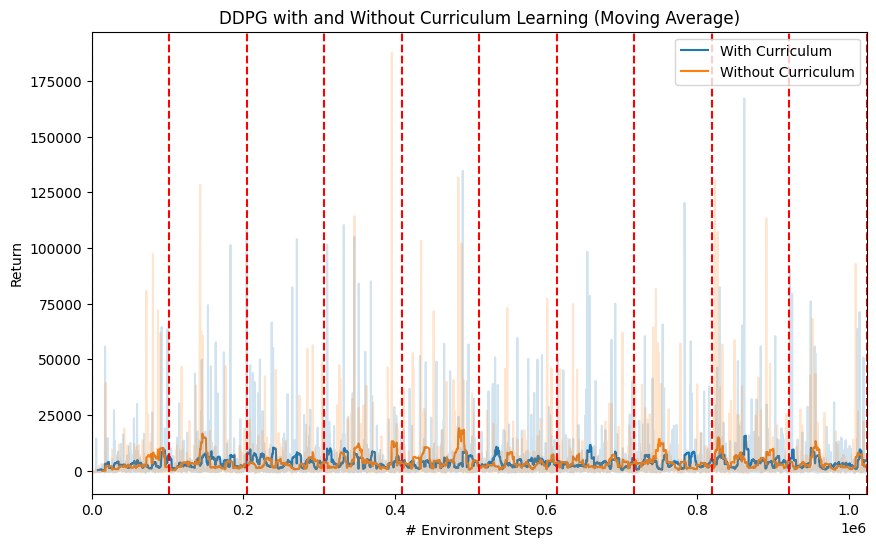

In [78]:
fig = plt.figure(figsize=(10, 6))
PLOT1_WINDOW=20
ddpg_c = plot_plt_rolling(ddpg_curriculum, PLOT1_WINDOW, label="With Curriculum")
ddpg_n = plot_plt_rolling(ddpg_norm, PLOT1_WINDOW, label="Without Curriculum")
plot_plt(ddpg_curriculum, alpha=0.2, color=ddpg_c[0].get_color())
plot_plt(ddpg_norm, alpha=0.2, color=ddpg_n[0].get_color())
plt.xlabel("# Environment Steps")
plt.ylabel("Return")
plt.xlim((0, 1024000))
plot_diff()
plt.legend()

plt.title("DDPG with and Without Curriculum Learning (Moving Average)")

plt.savefig("images/DDPG_figure.png")

In [79]:
sac_curriculum = extract_tensorboard_scalars("../logs/sac_cirr", scalar_keys="charts/episodic_return")['charts/episodic_return']
sac_norm = extract_tensorboard_scalars("../logs/sac_norm", scalar_keys="charts/episodic_return")['charts/episodic_return']
sac_curriculum["step"] = np.multiply(ddpg_curriculum["step"], 256)
sac_norm["step"] = np.multiply(ddpg_norm["step"], 256)

DirectoryDeletedError: Directory ../logs/sac_norm has been permanently deleted